Objective Function: f(x)=x2+4sin⁡(x), which we aim to minimize.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the objective function
def objective_function(x):
    return x**2 + 4 * np.sin(x)

In [3]:
# Simulated Annealing algorithm
def simulated_annealing(objective, bounds, T0, cooling_rate, max_iter):
    # Initial solution
    x_current = np.random.uniform(bounds[0], bounds[1])
    f_current = objective(x_current)
    T = T0  # Initial temperature

    # Store the best solution
    x_best = x_current
    f_best = f_current

    # Simulated Annealing loop
    for i in range(max_iter):
        # Generate a new candidate solution (neighboring solution)
        x_new = x_current + np.random.uniform(-1, 1)
        x_new = np.clip(x_new, bounds[0], bounds[1])  # Keep within bounds
        f_new = objective(x_new)

        # Calculate acceptance probability
        delta_f = f_new - f_current
        if delta_f < 0 or np.random.rand() < np.exp(-delta_f / T):
            x_current, f_current = x_new, f_new  # Accept new solution

            # Update the best solution if the new one is better
            if f_new < f_best:
                x_best, f_best = x_new, f_new

        # Cool down temperature
        T *= cooling_rate

    return x_best, f_best

In [4]:
# Parameters for Simulated Annealing
bounds = (-10, 10)       # Range for x
T0 = 1000                # Initial temperature
cooling_rate = 0.99      # Cooling rate
max_iter = 1000          # Number of iterations

In [5]:
# Run the Simulated Annealing algorithm
best_x, best_f = simulated_annealing(objective_function, bounds, T0, cooling_rate, max_iter)

# Print the best solution found
print("Best solution x:", best_x)
print("Best objective value f(x):", best_f)

Best solution x: -1.0305802884572877
Best objective value f(x): -2.368294622099355


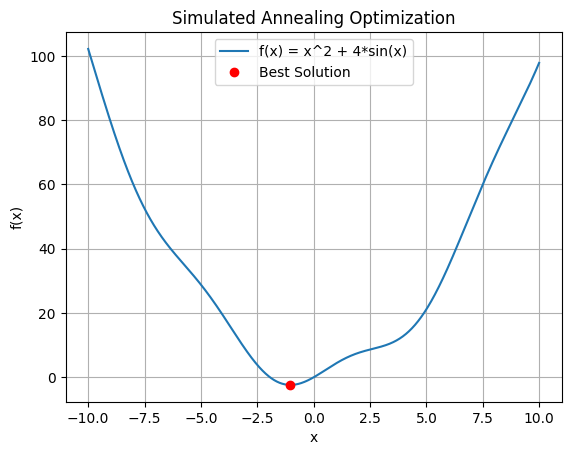

In [6]:
# Plot the objective function
x_values = np.linspace(bounds[0], bounds[1], 1000)
y_values = objective_function(x_values)
plt.plot(x_values, y_values, label="f(x) = x^2 + 4*sin(x)")
plt.plot(best_x, best_f, 'ro', label="Best Solution")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Simulated Annealing Optimization")
plt.legend()
plt.grid(True)
plt.show()